Building a Fuzzy Expert System...
Defining linguistic variables and their fuzzy sets...
Linguistic variables and fuzzy sets defined successfully.
Constructing fuzzy rules...
Fuzzy rules constructed successfully.
Creating the fuzzy expert system...
Fuzzy expert system created successfully.
Forward chaining evaluation...


Enter foundation damage (0 to 1):  0
Enter column damage (0 to 1):  .2
Enter roof collapse (0 to 1):  .2
Enter burning severity (0 to 1):  .1
Enter stairs damage (0 to 1):  0
Enter internal parts damage (0 to 1):  0


Recommendation (Forward Chaining) is: 0.11 (Treat)
Visualizing the fuzzy system...



Enter the desired recommendation (Treat, Partial Remove, Remove):  Treat



Performing backward chaining for goal: Treat...

Found 6 relevant rule(s).

Rule 1:
  - foundation_damage: Low
  => recommendation: Treat

Rule 2:
  - burning_severity: Superficial
  => recommendation: Treat

Rule 3:
  - column_damage: Minor
  => recommendation: Treat

Rule 4:
  - stairs_damage: Low
  => recommendation: Treat

Rule 5:
  - internal_parts_damage: Minimal
  => recommendation: Treat

Rule 6:
  - stairs_damage: Low
  - internal_parts_damage: Minimal
  => recommendation: Treat

Please provide values for the antecedents (0 to 1):


Enter value for foundation_damage (0 to 1):  .3
Enter value for burning_severity (0 to 1):  .5
Enter value for column_damage (0 to 1):  .2
Enter value for stairs_damage (0 to 1):  .1
Enter value for internal_parts_damage (0 to 1):  .4



Evaluating input values against relevant rules:

Rule 1:
  - foundation_damage = 0.30, Membership in 'Low': 0.00
  => Input values align with Rule 1 for goal 'Treat'.

Rule 2:
  - burning_severity = 0.50, Membership in 'Superficial': 0.00
  => Input values do not align with Rule 2 for goal 'Treat'.

Rule 3:
  - column_damage = 0.20, Membership in 'Minor': 1.00
  => Input values align with Rule 3 for goal 'Treat'.

Rule 4:
  - stairs_damage = 0.10, Membership in 'Low': 1.00
  => Input values align with Rule 4 for goal 'Treat'.

Rule 5:
  - internal_parts_damage = 0.40, Membership in 'Minimal': 0.00
  => Input values do not align with Rule 5 for goal 'Treat'.

Rule 6:
  - stairs_damage = 0.10, Membership in 'Low': 1.00
  - internal_parts_damage = 0.40, Membership in 'Minimal': 0.00
  => Input values do not align with Rule 6 for goal 'Treat'.
Fuzzy Expert System completed executing.


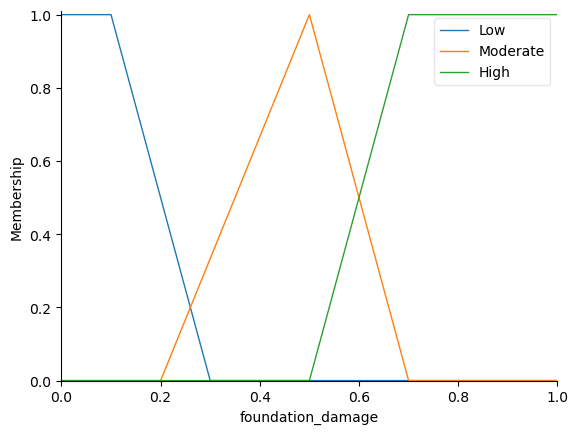

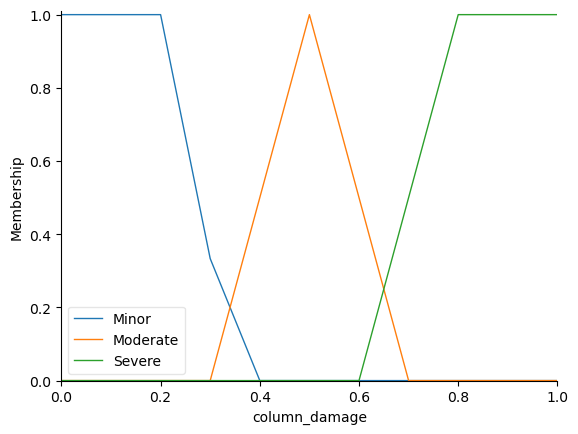

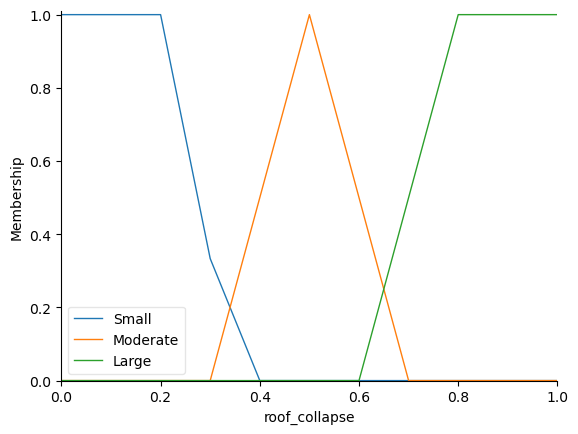

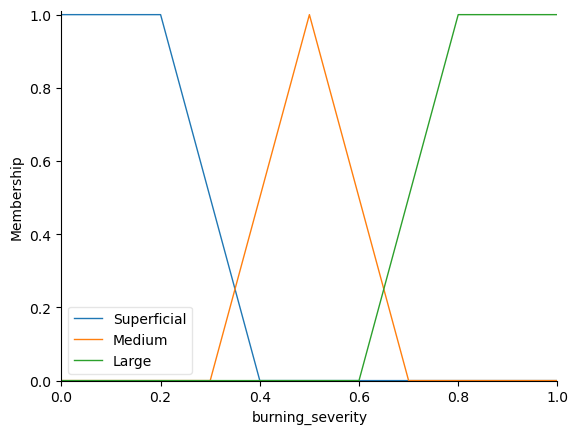

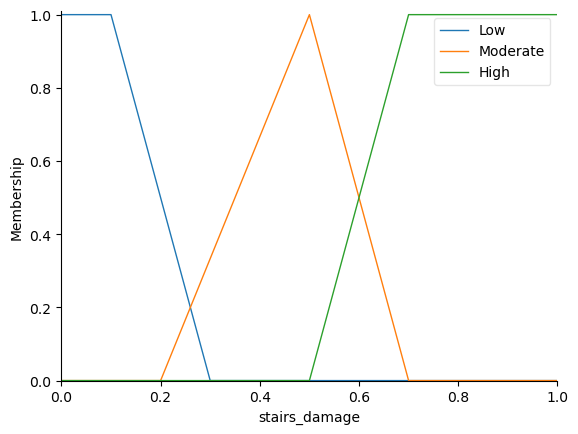

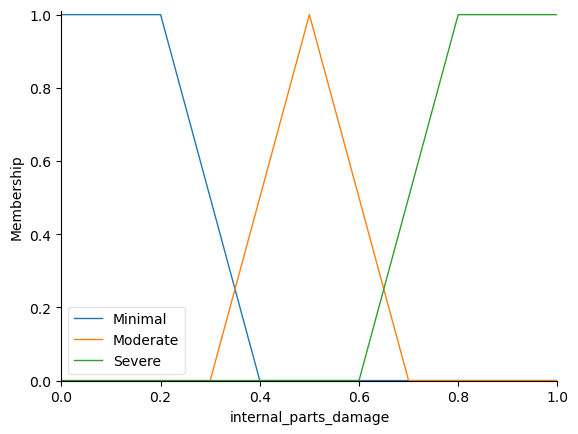

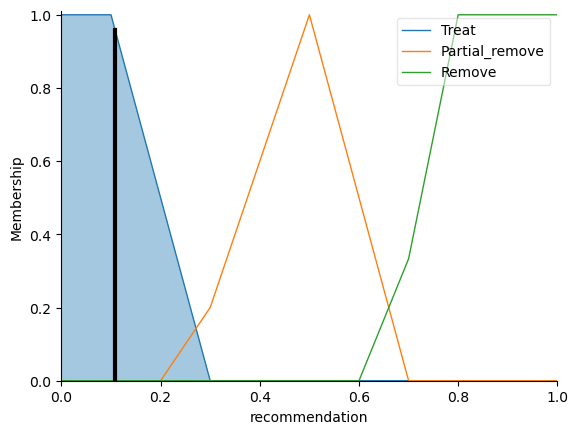

In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Step 1: Specify the problem and define linguistic variables
def define_variables():
    print("Defining linguistic variables and their fuzzy sets...")
    foundation_damage = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'foundation_damage')
    column_damage = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'column_damage')
    roof_collapse = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'roof_collapse')
    burning_severity = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'burning_severity')
    stairs_damage = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'stairs_damage')
    internal_parts_damage = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'internal_parts_damage')
    recommendation = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'recommendation')

    # Define fuzzy sets for each variable
    foundation_damage['Low'] = fuzz.trapmf(foundation_damage.universe, [0, 0, 0.1, 0.3])
    foundation_damage['Moderate'] = fuzz.trimf(foundation_damage.universe, [0.2, 0.5, 0.7])
    foundation_damage['High'] = fuzz.trapmf(foundation_damage.universe, [0.5, 0.7, 1, 1])

    column_damage['Minor'] = fuzz.trapmf(column_damage.universe, [0, 0, 0.2, 0.35])
    column_damage['Moderate'] = fuzz.trimf(column_damage.universe, [0.3, 0.5, 0.7])
    column_damage['Severe'] = fuzz.trapmf(column_damage.universe, [0.6, 0.8, 1, 1])
    
    roof_collapse['Small'] = fuzz.trapmf(roof_collapse.universe, [0, 0, 0.2, 0.35])
    roof_collapse['Moderate'] = fuzz.trimf(roof_collapse.universe, [0.3, 0.5, 0.7])
    roof_collapse['Large'] = fuzz.trapmf(roof_collapse.universe, [0.6, 0.8, 1, 1])

    burning_severity['Superficial'] = fuzz.trapmf(burning_severity.universe, [0, 0, 0.2, 0.4])
    burning_severity['Medium'] = fuzz.trimf(burning_severity.universe, [0.3, 0.5, 0.7])
    burning_severity['Large'] = fuzz.trapmf(burning_severity.universe, [0.6, 0.8, 1, 1])

    stairs_damage['Low'] = fuzz.trapmf(stairs_damage.universe, [0, 0, 0.1, 0.3])
    stairs_damage['Moderate'] = fuzz.trimf(stairs_damage.universe, [0.2, 0.5, 0.7])
    stairs_damage['High'] = fuzz.trapmf(stairs_damage.universe, [0.5, 0.7, 1, 1])

    internal_parts_damage['Minimal'] = fuzz.trapmf(internal_parts_damage.universe, [0, 0, 0.2, 0.4])
    internal_parts_damage['Moderate'] = fuzz.trimf(internal_parts_damage.universe, [0.3, 0.5, 0.7])
    internal_parts_damage['Severe'] = fuzz.trapmf(internal_parts_damage.universe, [0.6, 0.8, 1, 1])
    
    recommendation['Treat'] = fuzz.trapmf(recommendation.universe, [0, 0, 0.1, 0.3])
    recommendation['Partial_remove'] = fuzz.trimf(recommendation.universe, [0.25, 0.5, 0.7])
    recommendation['Remove'] = fuzz.trapmf(recommendation.universe, [0.65, 0.8, 1, 1])
    
    print("Linguistic variables and fuzzy sets defined successfully.")
    return foundation_damage, column_damage, roof_collapse, burning_severity, stairs_damage, internal_parts_damage, recommendation

# Step 2 & 3: Construct fuzzy rules
def construct_rules(foundation_damage, column_damage, roof_collapse, burning_severity, stairs_damage, internal_parts_damage, recommendation):
    print("Constructing fuzzy rules...")
    rule1 = ctrl.Rule(foundation_damage['Low'], recommendation['Treat'])
    rule2 = ctrl.Rule(foundation_damage['High'], recommendation['Remove'])
    rule3 = ctrl.Rule(foundation_damage['Moderate'], recommendation['Partial_remove'])
    
    rule4 = ctrl.Rule(burning_severity['Superficial'], recommendation['Treat'])
    rule5 = ctrl.Rule(burning_severity['Medium'], recommendation['Partial_remove'])
    rule6 = ctrl.Rule(burning_severity['Large'], recommendation['Remove'])

    rule7 = ctrl.Rule(roof_collapse['Moderate'], recommendation['Partial_remove'])

    rule8 = ctrl.Rule(column_damage['Moderate'], recommendation['Partial_remove'])
    rule9 = ctrl.Rule(column_damage['Minor'], recommendation['Treat'])
    
    rule10 = ctrl.Rule(roof_collapse['Small'] & column_damage['Moderate'], recommendation['Partial_remove'])
    rule11 = ctrl.Rule(roof_collapse['Moderate'] & column_damage['Moderate'], recommendation['Partial_remove'])
    rule12 = ctrl.Rule(roof_collapse['Large'] & column_damage['Severe'], recommendation['Remove'])
    
    rule13 = ctrl.Rule(foundation_damage['Moderate'] & roof_collapse['Large'], recommendation['Remove'])
    rule14 = ctrl.Rule(foundation_damage['Moderate'] & roof_collapse['Moderate'], recommendation['Partial_remove'])
    rule15 = ctrl.Rule(foundation_damage['Moderate'] & column_damage['Minor'], recommendation['Partial_remove'])
    rule16 = ctrl.Rule(foundation_damage['High'] & column_damage['Severe'], recommendation['Remove'])

    rule17 = ctrl.Rule(stairs_damage['Low'], recommendation['Treat'])
    rule18 = ctrl.Rule(stairs_damage['Moderate'], recommendation['Partial_remove'])
    rule19 = ctrl.Rule(stairs_damage['High'], recommendation['Remove'])

    rule20 = ctrl.Rule(internal_parts_damage['Minimal'], recommendation['Treat'])
    rule21 = ctrl.Rule(internal_parts_damage['Moderate'], recommendation['Partial_remove'])
    rule22 = ctrl.Rule(internal_parts_damage['Severe'], recommendation['Remove'])

    rule23 = ctrl.Rule(stairs_damage['High'] & internal_parts_damage['Severe'], recommendation['Remove'])
    rule24 = ctrl.Rule(stairs_damage['Moderate'] & internal_parts_damage['Moderate'], recommendation['Partial_remove'])
    rule25 = ctrl.Rule(stairs_damage['Low'] & internal_parts_damage['Minimal'], recommendation['Treat'])
    print("Fuzzy rules constructed successfully.")
    return [rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule20,
           rule21, rule22, rule23, rule24, rule25]

# Step 4: Encode fuzzy sets and rules into the expert system
def create_fuzzy_system(rules):
    print("Creating the fuzzy expert system...")
    control_system = ctrl.ControlSystem(rules)
    simulation = ctrl.ControlSystemSimulation(control_system)
    print("Fuzzy expert system created successfully.")
    return simulation

# Forward chaining: Compute recommendation based on inputs
def forward_chaining(simulation):
    print("Forward chaining evaluation...")

    foundation_damage_input = float(input("Enter foundation damage (0 to 1): "))
    column_damage_input = float(input("Enter column damage (0 to 1): "))
    roof_collapse_input = float(input("Enter roof collapse (0 to 1): "))
    burning_severity_input = float(input("Enter burning severity (0 to 1): "))
    stairs_damage_input = float(input("Enter stairs damage (0 to 1): "))
    internal_parts_damage_input = float(input("Enter internal parts damage (0 to 1): "))

    simulation.input['foundation_damage'] = foundation_damage_input
    simulation.input['column_damage'] = column_damage_input
    simulation.input['roof_collapse'] = roof_collapse_input
    simulation.input['burning_severity'] = burning_severity_input
    simulation.input['stairs_damage'] = stairs_damage_input
    simulation.input['internal_parts_damage'] = internal_parts_damage_input

    simulation.compute()
    result = simulation.output['recommendation']
    print(f"Recommendation (Forward Chaining) is: {result:.2f} ({numerical_to_linguistic(result)})")

    return simulation

# Backward chaining
def backward_chaining(goal, rules):
    """
    Perform backward chaining with user inputs for antecedents to verify alignment with rules.
    """
    print(f"\nPerforming backward chaining for goal: {goal}...")
    
    # Filter rules leading to the specified goal
    relevant_rules = []
    for rule in rules:
        consequent_str = str(rule.consequent[0])
        consequent_label = consequent_str.split('[')[1].split(']')[0].replace('"', '')     # Get the linguistic value (e.g., 'Remove', 'Partial_remove')
        
        if consequent_label == goal:        
            relevant_rules.append(rule)
            
    if not relevant_rules:
        print("No rules lead to the specified goal.")
        return
    
    print(f"\nFound {len(relevant_rules)} relevant rule(s).")
    for i, rule in enumerate(relevant_rules, start=1):
        consequent_str = str(rule.consequent[0])
        consequent_label = consequent_str.split('[')[1].split(']')[0].replace('"', '')
        print(f"\nRule {i}:")
        for antecedent in rule.antecedent_terms:
            print(f"  - {str(antecedent).split('[')[0]}: {antecedent.label}")              # Get the linguistic variable (e.g., 'foundation_damage'), and its linguistic value
        print(f"  => {consequent_str.split('[')[0]}: {consequent_label}")
   
    antecedent_values = {}
    print("\nPlease provide values for the antecedents (0 to 1):")
    for rule in relevant_rules:
        for antecedent in rule.antecedent_terms:
            antecedent_name = str(antecedent).split('[')[0]                               # Get the linguistic variable (e.g., 'foundation_damage')
            if antecedent_name not in antecedent_values:                                  # Avoid duplicate prompts
                antecedent_values[antecedent_name] = float(
                    input(f"Enter value for {antecedent_name} (0 to 1): ")
                )
                
    # Check alignment of input values with rules
    print("\nEvaluating input values against relevant rules:")
    for i, rule in enumerate(relevant_rules, start=1):
        alignment = True
        print(f"\nRule {i}:")
        for antecedent in rule.antecedent_terms:
            antecedent_str = str(antecedent)
            var_name =  antecedent_str.split('[')[0]
            term_name = antecedent.label                                                # Get the antecedent's term(linguistic value) (e.g., 'Low', 'High')
            # Retrieve the fuzzy variable and its membership function
            fuzzy_var = antecedent.parent
            membership_function = fuzzy_var[term_name].mf
            universe = fuzzy_var.universe
            
            # Compute membership using fuzz.interp_membership
            membership_degree = fuzz.interp_membership(universe, membership_function, antecedent_values[var_name])
            print(f"  - {var_name} = {antecedent_values[var_name]:.2f}, Membership in '{term_name}': {membership_degree:.2f}")
            if membership_degree == 0:
                alignment = False
        if alignment:
            print(f"  => Input values align with Rule {i} for goal '{goal}'.")
        else:
            print(f"  => Input values do not align with Rule {i} for goal '{goal}'.")

# Helper function to convert numerical value to linguistic variable
def numerical_to_linguistic(value):
    if 0 <= value <= 0.3:
        return 'Treat'
    elif 0.25 <= value <= 0.7:
        return 'Partial Remove'
    elif 0.65 <= value <= 1:
        return 'Remove'
    else:
        return 'Undefined'

def visualize_system(foundation_damage, column_damage, roof_collapse, burning_severity, stairs_damage, internal_parts_damage, recommendation, simulation):
    print("Visualizing the fuzzy system...")

    foundation_damage.view()
    column_damage.view()
    roof_collapse.view()
    burning_severity.view()
    stairs_damage.view()
    internal_parts_damage.view()
    
    recommendation.view(sim=simulation)


if __name__ == "__main__":
    print("Building a Fuzzy Expert System...")

    foundation_damage, column_damage, roof_collapse, burning_severity, stairs_damage, internal_parts_damage, recommendation= define_variables()

    rules = construct_rules(foundation_damage, column_damage, roof_collapse, burning_severity, stairs_damage, internal_parts_damage, recommendation)

    simulation = create_fuzzy_system(rules)

    # Choose which chaining method to use
    forward_chaining(simulation)

    visualize_system(foundation_damage, column_damage, roof_collapse, burning_severity, stairs_damage, internal_parts_damage, recommendation, simulation)
    
    goal = input("\nEnter the desired recommendation (Treat, Partial Remove, Remove): ")
    backward_chaining(goal, rules)

    print("Fuzzy Expert System completed executing.")


## Test the system using 3 different cases 

1. **First case:**
   - Forward Chaining:
       - foundation damage = 0.9, column damage = 0.8, roof collapse = 0.7, stairs damage = 0.5, internal parts damage = 0.7 and burning severity = 0.6.
         - M(f=High)=1
         - M(c=severe)=1
         - M(r=Large)=0.5
         - M(b=Medium)=0.5
         - M(s=Moderate)=1
         - M(i=Severe)=0.5
       - The output is >> Recommendation (Forward Chaining) is: 0.71 (Remove).
         - The result obtained after applying rule evaluation is:
           - M(m=Remove)=1 **from rule1 & 2 & 16**
           - M(m=Remove)=0.5 **from rule3 & 4 & 22** ==> Compute the average of all membership values ==> M(m=Remove)=(1+1+1+0.5+0.5+0.5)/6=0.75
           - M(m=Partial_remove)=0.5 **from rule12**
           - M(m=Partial_remove)=1 **from rule18** ==> Compute the average of all membership values ==> M(m=Partial_remove)=(1+0.5)/2=0.75
          - So, COG = (0.6 + 0.7 + 0.8 + 0.9 + 1)*0.75 + (0.2 + 0.3 + 0.4 + 0.5 + 0.6 + 0.7)*0.75 / (0.75 + 0.75 + 0.75 + 0.75 + 0.75 + 0.75 + 0.75 + 0.75 + 0.75 + 0.75 + 0.75) = 0.61 Which is approximately equal to the resulting value (because we used approximated values).

    - Backward Chaining:
        - goal = Remove, foundation damage = 0.9, column damage = 0.8, roof collapse = 0.7, stairs damage = 0.5, internal parts damage = 0.7 and burning severity = 0.6.
        - Evaluating input values against relevant rules:

            - Rule 1:
              - foundation_damage = 0.90, Membership in 'High': 1.00
              - => Input values align with Rule 1 for goal 'Remove'.

            - Rule 2:
              - burning_severity = 0.60, Membership in 'Large': 0.00
              - => Input values align with Rule 2 for goal 'Remove'.\

            - Rule 3:
              - roof_collapse = 0.60, Membership in 'Large': 0.00
              - column_damage = 0.80, Membership in 'Severe': 1.00
              - => Input values align with Rule 3 for goal 'Remove'.
            
            - Rule 4:
              - foundation_damage = 0.90, Membership in 'Moderate': 0.00
              - roof_collapse = 0.60, Membership in 'Large': 0.00
              - => Input values do not align with Rule 4 for goal 'Remove'.
            
            - Rule 5:
              - foundation_damage = 0.90, Membership in 'High': 1.00
              - column_damage = 0.80, Membership in 'Severe': 1.00
              - => Input values align with Rule 5 for goal 'Remove'.
            
            - Rule 6:
              - internal_parts_damage = 0.70, Membership in 'Severe': 0.50
              - => Input values align with Rule 6 for goal 'Remove'.
            
            - Rule 7:
              - stairs_damage = 0.50, Membership in 'High': 0.00
              - internal_parts_damage = 0.70, Membership in 'Severe': 0.50
              - => Input values do not align with Rule 7 for goal 'Remove'.
2. **Second case:**
   - Forward Chaining:
       - foundation damage = 0.5, column damage = 0.4, roof collapse = 0.4, stairs damage = 0.4, internal parts damage = 0.3 and burning severity = 0.1.
         - M(f=Moderate)=1
         - M(c=Moderate)=0.5
         - M(r=Moderate)=0.5
         - M(s=Moderate)=0.67
         - M(i=Minimal) = 0.5
         - M(b=Superficial)=1
       - The output is >> Recommendation (Forward Chaining) is: 0.31 (Partial Remove).
        - M(m=Partial_remove)=1 **from rule3**
        - M(m=Partial_remove)=0.5 **from rule7 & 8 & 11 & 14 & 20**
        - M(m=Partial_remove)=0.67 **from rule18**==> Compute the average of all membership values ==> M(m=Partial_remove)=(1+0.5+0.5+0.5+0.5+0.67)/6=0.61
        - M(m=Treat)=0.5
        - So, COG = (0.2+0.3+0.4+0.5+0.6+0.7)*0.61 + (0+0.1+0.2+0.3)*0.5 / (0.61+0.61+0.61+0.61+0.61+0.61+0.5+0.5+0.5+0.5) = 0.34 Which is approximately equal to the resulting value (because we used approximated values).
    - Backward Chaining:
        - goal = Partial_remove, foundation damage = 0.5, column damage = 0.4, roof collapse = 0.4, stairs damage = 0.4, internal parts damage = 0.3 and burning severity = 0.1.
        - Evaluating input values against relevant rules:

        - Rule 1:
          - foundation_damage = 0.50, Membership in 'Moderate': 1.00
          - => Input values align with Rule 1 for goal 'Partial_remove'.
        
        - Rule 2:
          - burning_severity = 0.10, Membership in 'Medium': 0.00
          = => Input values do not align with Rule 2 for goal 'Partial_remove'.
        
        - Rule 3:
          - roof_collapse = 0.40, Membership in 'Moderate': 0.50
          - => Input values align with Rule 3 for goal 'Partial_remove'.
        
        - Rule 4:
          - column_damage = 0.40, Membership in 'Moderate': 0.50
          - => Input values align with Rule 4 for goal 'Partial_remove'.
        
        - Rule 5:
          - roof_collapse = 0.40, Membership in 'Small': 0.00
          - column_damage = 0.40, Membership in 'Moderate': 0.50
          - => Input values do not align with Rule 5 for goal 'Partial_remove'.
        
        - Rule 6:
          - roof_collapse = 0.40, Membership in 'Moderate': 0.50
          - column_damage = 0.40, Membership in 'Moderate': 0.50
          - => Input values align with Rule 6 for goal 'Partial_remove'.

        - Rule 7:
          - foundation_damage = 0.50, Membership in 'Moderate': 1.00
          - roof_collapse = 0.40, Membership in 'Moderate': 0.50
          - => Input values align with Rule 7 for goal 'Partial_remove'.
        
        - Rule 8:
          - foundation_damage = 0.50, Membership in 'Moderate': 1.00
          - column_damage = 0.40, Membership in 'Minor': 0.00
          - => Input values do not align with Rule 8 for goal 'Partial_remove'.
        
        - Rule 9:
          - internal_parts_damage = 0.30, Membership in 'Moderate': 0.00
          - => Input values align with Rule 9 for goal 'Partial_remove'.
        
        - Rule 10:
          - stairs_damage = 0.40, Membership in 'Moderate': 0.67
          - internal_parts_damage = 0.30, Membership in 'Moderate': 0.00
          - => Input values align with Rule 10 for goal 'Partial_remove'.

3. **Third case:**
    - Forward Chaining:
        - foundation damage = 0, column damage = 0.2, roof collapse = 0.2, stairs damage = 0, internal parts damage = 0 and burning severity = 0.1.
          - M(f=Low)=1
          - M(c=Minor)=1
          - M(r=Small)=1
          - M(s=Low)=1
          - M(i=Minimal)=1
          - M(b=Superficial)=1
        - The output is >> Recommendation (Forward Chaining) is: 0.11 (Treat).
          - M(m=Treat)=1 **from rule1 & 4 & 9 & 17 & 20 & 25**
          - So, COG = (0+0.1+0.2+0.3)*1 / (1+1+1+1) = 0.15 Which is approximately equal to the resulting value (because we used approximated values).
    - Backward Chaining:
        - goal = Partial_remove, foundation damage = 0.3, column damage = 0.2, stairs damage = 0.1, internal parts damage = 0.4, burning severity = 0.5.
        - Evaluating input values against relevant rules:

           - Rule 1:
              - foundation_damage = 0.30, Membership in 'Low': 0.00
             - => Input values align with Rule 1 for goal 'Treat'.
            
           - Rule 2:
              - burning_severity = 0.50, Membership in 'Superficial': 0.00
             - => Input values do not align with Rule 2 for goal 'Treat'.
            
           - Rule 3:
              - column_damage = 0.20, Membership in 'Minor': 1.00
             - => Input values align with Rule 3 for goal 'Treat'.
            
           - Rule 4:
              - stairs_damage = 0.10, Membership in 'Low': 1.00
             - => Input values align with Rule 4 for goal 'Treat'.
            
           - Rule 5:
              - internal_parts_damage = 0.40, Membership in 'Minimal': 0.00
             - => Input values do not align with Rule 5 for goal 'Treat'.
            
           - Rule 6:
              - stairs_damage = 0.10, Membership in 'Low': 1.00
              - internal_parts_damage = 0.40, Membership in 'Minimal': 0.00
             - => Input values do not align with Rule 6 for goal 'Treat'.

Building a Fuzzy Expert System with 3D Visualization...
Defining linguistic variables and their fuzzy sets...
Linguistic variables and fuzzy sets defined successfully.
Constructing fuzzy rules...
Fuzzy rules constructed successfully.
Creating the fuzzy expert system...
Fuzzy expert system created successfully.


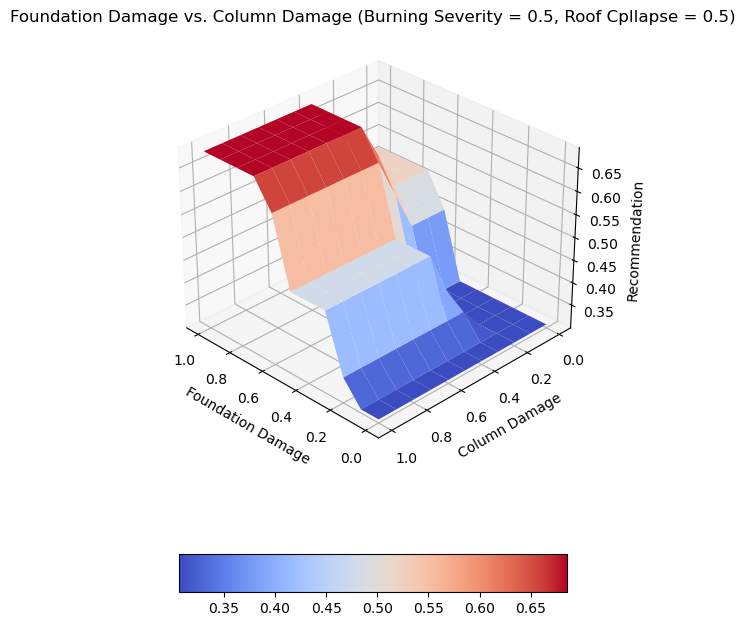

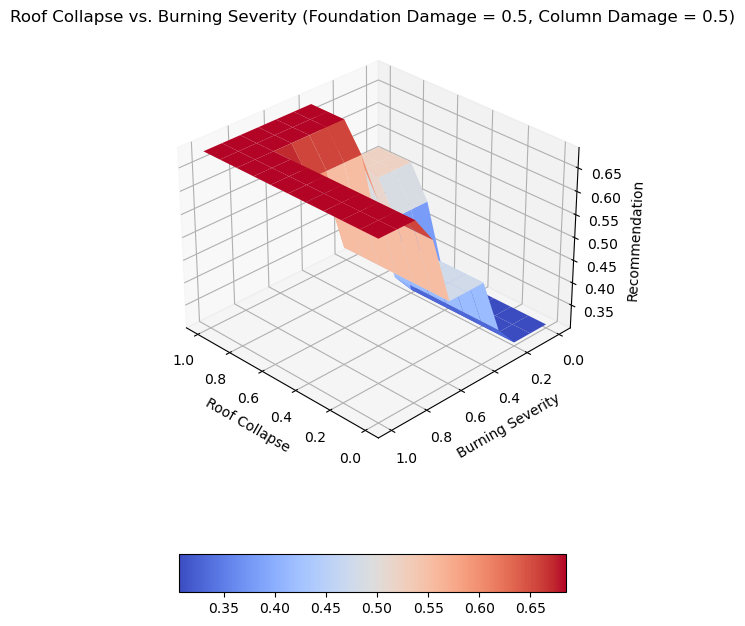

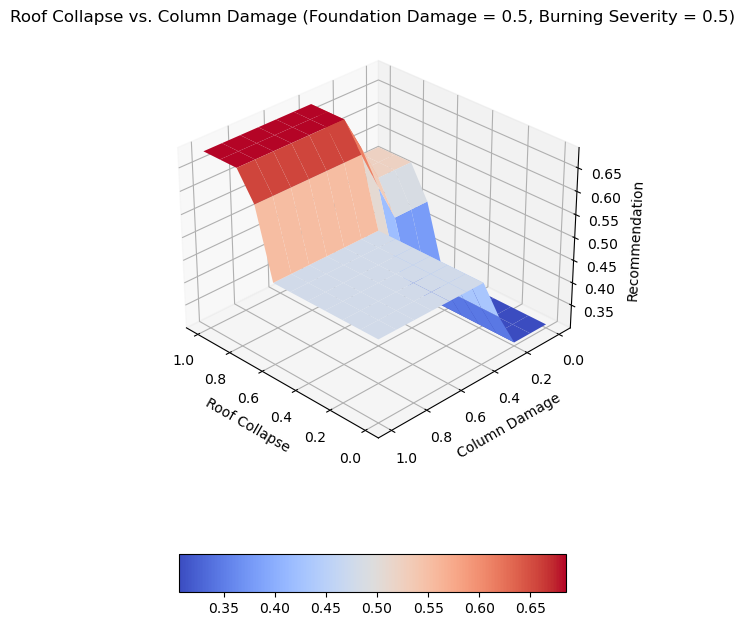

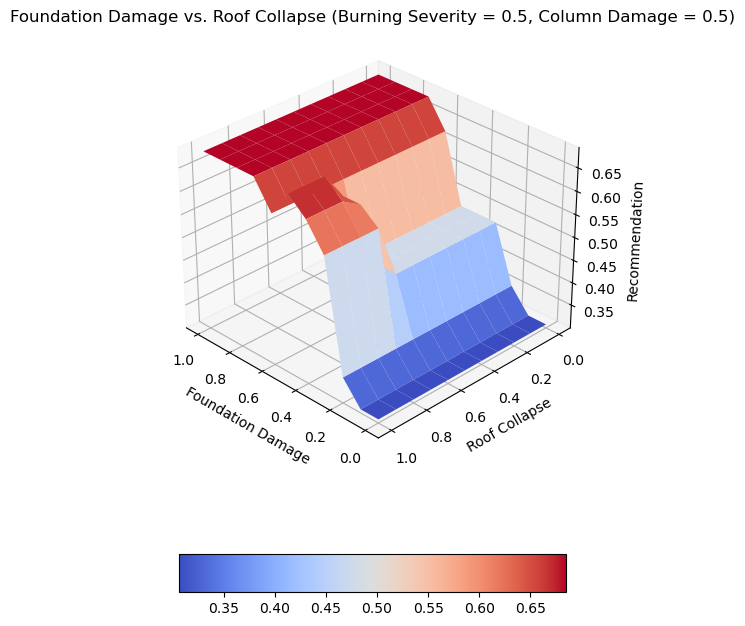

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_3D_plots(simulation):
    # Create grids for the input variables
    input_range = np.arange(0, 1.1, 0.1)
    
    # Plot 1: foundation_damage vs. column_damage, fixed burning_severity, roof_collapse, stairs_damage, and internal_parts_damage
    foundation_damage, column_damage = np.meshgrid(input_range, input_range)
    recommendation_values_1 = np.zeros_like(foundation_damage)

    for i in range(foundation_damage.shape[0]):
        for j in range(foundation_damage.shape[1]):
            simulation.input['foundation_damage'] = foundation_damage[i, j]
            simulation.input['column_damage'] = column_damage[i, j]
            simulation.input['roof_collapse'] = 0.5  # Fixed value
            simulation.input['burning_severity'] = 0.5  # Fixed value
            simulation.input['stairs_damage'] = 0.5  # Fixed value
            simulation.input['internal_parts_damage'] = 0.5  # Fixed value
            simulation.compute()
            recommendation_values_1[i, j] = simulation.output['recommendation']
    
    # Plot the 3D surface
    fig1 = plt.figure(figsize=(10, 8))
    ax1 = fig1.add_subplot(111, projection='3d')
    surf1 = ax1.plot_surface(foundation_damage, column_damage, recommendation_values_1, cmap='coolwarm')
    ax1.set_title("Foundation Damage vs. Column Damage (Burning Severity = 0.5, Roof Cpllapse = 0.5)")
    ax1.set_xlabel('Foundation Damage')
    ax1.set_ylabel('Column Damage')
    ax1.set_zlabel('Recommendation')
    ax1.view_init(elev=30, azim=135)
    fig1.colorbar(surf1, shrink=0.5, aspect=10, location='bottom')
    plt.show()

    # Plot 2: roof_collapse vs. burning_severity, fixed foundation_damage, column_damage, stairs_damage, and internal_parts_damage
    roof_collapse, burning_severity = np.meshgrid(input_range, input_range)
    recommendation_values_2 = np.zeros_like(roof_collapse)

    for i in range(roof_collapse.shape[0]):
        for j in range(roof_collapse.shape[1]):
            simulation.input['roof_collapse'] = roof_collapse[i, j]
            simulation.input['burning_severity'] = burning_severity[i, j]
            simulation.input['column_damage'] = 0.5  # Fixed value
            simulation.input['foundation_damage'] = 0.5  # Fixed value
            simulation.input['stairs_damage'] = 0.5  # Fixed value
            simulation.input['internal_parts_damage'] = 0.5  # Fixed value
            simulation.compute()
            recommendation_values_2[i, j] = simulation.output['recommendation']

    # Plot the 3D surface
    fig2 = plt.figure(figsize=(10, 8))
    ax2 = fig2.add_subplot(111, projection='3d')
    surf2 = ax2.plot_surface(roof_collapse, burning_severity, recommendation_values_2, cmap='coolwarm')
    ax2.set_title("Roof Collapse vs. Burning Severity (Foundation Damage = 0.5, Column Damage = 0.5)")
    ax2.set_xlabel('Roof Collapse')
    ax2.set_ylabel('Burning Severity')
    ax2.set_zlabel('Recommendation')
    ax2.view_init(elev=30, azim=135)
    fig2.colorbar(surf2, shrink=0.5, aspect=10, location='bottom')
    plt.show()

    # Plot 3: roof_collapse vs. column_damage, fixed foundation_damage, burning_severity, stairs_damage, and internal_parts_damage
    roof_collapse, column_damage = np.meshgrid(input_range, input_range)
    recommendation_values_3 = np.zeros_like(roof_collapse)

    for i in range(roof_collapse.shape[0]):
        for j in range(roof_collapse.shape[1]):
            simulation.input['roof_collapse'] = roof_collapse[i, j]
            simulation.input['column_damage'] = column_damage[i, j]
            simulation.input['foundation_damage'] = 0.5  # Fixed value
            simulation.input['burning_severity'] = 0.5  # Fixed value
            simulation.input['stairs_damage'] = 0.5  # Fixed value
            simulation.input['internal_parts_damage'] = 0.5  # Fixed value
            simulation.compute()
            recommendation_values_3[i, j] = simulation.output['recommendation']
            
    # Plot the 3D surface
    fig3 = plt.figure(figsize=(10, 8))
    ax3 = fig3.add_subplot(111, projection='3d')
    surf3 = ax3.plot_surface(roof_collapse, column_damage, recommendation_values_3, cmap='coolwarm')
    ax3.set_title("Roof Collapse vs. Column Damage (Foundation Damage = 0.5, Burning Severity = 0.5)")
    ax3.set_xlabel('Roof Collapse')
    ax3.set_ylabel('Column Damage')
    ax3.set_zlabel('Recommendation')
    ax3.view_init(elev=30, azim=135)
    fig3.colorbar(surf3, shrink=0.5, aspect=10, location='bottom')
    plt.show()

    # Plot 4: foundation_damage vs. roof_collapse, fixed burning_severity, column_damage, stairs_damage, and internal_parts_damage
    foundation_damage, roof_collapse = np.meshgrid(input_range, input_range)
    recommendation_values_4 = np.zeros_like(foundation_damage)

    for i in range(foundation_damage.shape[0]):
        for j in range(foundation_damage.shape[1]):
            simulation.input['foundation_damage'] = foundation_damage[i, j]
            simulation.input['roof_collapse'] = roof_collapse[i, j]
            simulation.input['burning_severity'] = 0.5  # Fixed value
            simulation.input['column_damage'] = 0.5  # Fixed value
            simulation.input['stairs_damage'] = 0.5  # Fixed value
            simulation.input['internal_parts_damage'] = 0.5  # Fixed value
            simulation.compute()
            recommendation_values_4[i, j] = simulation.output['recommendation']
    
    # Plot the 3D surface
    fig4 = plt.figure(figsize=(10, 8))
    ax4 = fig4.add_subplot(111, projection='3d')
    surf4 = ax4.plot_surface(foundation_damage, roof_collapse, recommendation_values_4, cmap='coolwarm')
    ax4.set_title("Foundation Damage vs. Roof Collapse (Burning Severity = 0.5, Column Damage = 0.5)")
    ax4.set_xlabel('Foundation Damage')
    ax4.set_ylabel('Roof Collapse')
    ax4.set_zlabel('Recommendation')
    ax4.view_init(elev=30, azim=135)
    fig4.colorbar(surf4, shrink=0.5, aspect=10, location='bottom')
    plt.show()
    
if __name__ == "__main__":
    print("Building a Fuzzy Expert System with 3D Visualization...")
    ffoundation_damage, column_damage, roof_collapse, burning_severity, stairs_damage, internal_parts_damage, recommendation = define_variables()
    rules = construct_rules(foundation_damage, column_damage, roof_collapse, burning_severity, stairs_damage, internal_parts_damage, recommendation)
    simulation = create_fuzzy_system(rules)

    # Generate 3D plots
    generate_3D_plots(simulation)
